Spelling has evolved throughout history, and that is what we will explore in this notebook.

We can use a visualization to gain insight into how the different spellings of various words have changed over time. We begin by deciding which words' evolution we want to investigate. We do this by looking up a dictionary that contains information about old spellings. [Ordbog over det Danske Sprog - historisk ordbog 1700 - 1950](https://ordnet.dk/ods) is such a dictionary. 

Click on the link to go to the dictionary. Enter a word in the search field. For example, [it could be the word "rejse" (travel). You can read that in addition to writing the word as rejse](https://ordnet.dk/ods/ordbog?query=rejse), we have previously written it both as "reise" and "reyse". 

In this way, we can create a list of different historical spellings of the word "rejse"; 'rejse', 'reyse', and 'reise'.

We begin by loading the dataset, which is found in the file 'kb_metadata_dan_filtered.csv'. Try to read the documentation in the script below while you run the code through. In the end, you will get a nice visualization. Can you modify the script so that you can create a visualization of the development of other words?

If you need further assistance, feel free to ask!

In [1]:
# import libraries
import pandas as pd
import os

In [2]:
# read the data set
df = pd.read_csv('kb_metadata_dan_filtered.csv')

#inspect the dataset
df

,author_st,title,year_st,publisher,place,sub_4,sub_3_st,misc_comments
0,"Cramer, Chr.'",Arithmetica tyronica eller grundig Vejviisning...,1780.0,NaN,Sorøe,Mathematik Ren Mathematisk Analyse.,"18,-118",1 bd.
1,"Cramer, Chr.'",Arithmetica tyronica eller grundig Veiviisning...,1806.0,NaN,Viborg,Mathematik Ren Mathematisk Analyse.,"18,-118",176 s.
2,NaN,"Biblia, paa Danske, det er, Den gantske hellig...",1607.0,Prentet ved Niels Michelsøn,Kiøbinghaffn,Theologi Indledning til Theologien.,"1,-27",1 bd.Med kobberstukket titelbl. og Christian I...
3,NaN,"Biblia, paa Danske, Det er: Den gandske hellig...",1644.0,s.n.,Kiøbinghafn,Theologi Indledning til Theologien.,"1,-28",2 bd.Med kobberstukket titelbl.[1]. - Indhold:...
4,"Hertel, Th.'","Tidstavler til Historien, lempede efter Fordri...",1881.0,NaN,Odense,NaN,"29,-22",31 s.
...,...,...,...,...,...,...,...,...
87216,"Hansen, Chr.'",Facitliste med endel Opløsninger til Tavleregn...,1874.0,NaN,Odense,NaN,"18,-152",24 s.
87217,"Hallager, M.'",Ny dansk Læsebog for de første Begyndere / af ...,1875.0,Schubothe,Kbh.,NaN,"15,-181",143 s.
87218,"Handest, M. C.'",Lærebog til Brug ved Religionsundervisningen i...,1896.0,NaN,Aarhus,NaN,"3,-451",95 s.
87219,"Hallager, M.'",M. Hallagers tydske Læsebog for Begyndere.,1842.0,NaN,Kbh.,NaN,"47,-319",1 bd.


In [3]:
# Create a subset of the dataset (you do not need to use all columns) 

subset = df[['title', 'year_st']]


# Filter rows that have NaN values ​​in 'year_st'
subset = subset.dropna(subset=['year_st'])


# Sort the dataset based on the 'year_st' column so that lowest value is at the top
subset = subset.sort_values(by='year_st').reset_index(drop=True)

# Inspect the dataset
subset

,title,year_st
0,Christelig Levnets-Regler til hver Dag i Ugen ...,1050.0
1,Byggeplaner for Andelsmejerier.,1289.0
2,Tive Aandelige Paaske-Lilier eller Paaske-Betæ...,1337.0
3,Guds Børns tvende Boliger ... fremsætte udi Er...,1595.0
4,Ecteskabs Ordens Speyel oc Regel : hvor udi ma...,1601.0
...,...,...
85905,"Sangbog for St. Johannes-Logen, Zorobabel til ...",5837.0
85906,"Murer-Minde over Adam Vilhelm Hauch, Overmeste...",5838.0
85907,Sangbog for St. Johannes □ Zorobabel og Freder...,5859.0
85908,Dætte Brøv tæ men kære Las Nilsen fraa Mætte J...,7147.0


In [4]:
# Notice that there are data errors in the 'year_st' column, so we remove years before 1600 and after 1900.

subset = subset.query('year_st >=1600 and year_st <=1900 ').reset_index(drop=True)

# Inspect the dataset
subset

,title,year_st
0,Ecteskabs Ordens Speyel oc Regel : hvor udi ma...,1601.0
1,"En Undervisning aff den Hellige scrifft, hvad ...",1601.0
2,[Prædikener over Fader vor] / [aff Anders Jens...,1601.0
3,"Christelige oc ærekierre Frøikeners, Jomfruers...",1601.0
4,[De Tolff Patriarchers Jacobs Sønners Testamen...,1601.0
...,...,...
85856,Aandelig Vækkelse ved et Universitet. Et Fored...,1899.0
85857,Meddelelse om Studenterne fra 1859 ved Mindefe...,1899.0
85858,Udviklingen af Skibsskytsets Affutering og Ins...,1899.0
85859,12 Fotografier i Mappe.,1900.0


In [5]:
# Add a column with a grouping of years. Function to group years into intervals of five years
def group_years(year):
    return f"{(year // 5) * 5}-{((year // 5) * 5) + 4}"


# Add a column with a grouping of years. Function to group years into intervals of five years
subset.loc[:, 'year_group'] = subset['year_st'].apply(group_years)

subset

,title,year_st,year_group
0,Ecteskabs Ordens Speyel oc Regel : hvor udi ma...,1601.0,1600.0-1604.0
1,"En Undervisning aff den Hellige scrifft, hvad ...",1601.0,1600.0-1604.0
2,[Prædikener over Fader vor] / [aff Anders Jens...,1601.0,1600.0-1604.0
3,"Christelige oc ærekierre Frøikeners, Jomfruers...",1601.0,1600.0-1604.0
4,[De Tolff Patriarchers Jacobs Sønners Testamen...,1601.0,1600.0-1604.0
...,...,...,...
85856,Aandelig Vækkelse ved et Universitet. Et Fored...,1899.0,1895.0-1899.0
85857,Meddelelse om Studenterne fra 1859 ved Mindefe...,1899.0,1895.0-1899.0
85858,Udviklingen af Skibsskytsets Affutering og Ins...,1899.0,1895.0-1899.0
85859,12 Fotografier i Mappe.,1900.0,1900.0-1904.0


In [6]:
# Group by 'year_group', aggregate the 'title' column, and send back to dataframe
grouped_subset = subset.groupby('year_group')['title'].agg(lambda x: ' '.join(x)).to_frame().reset_index()

In [7]:
grouped_subset

,year_group,title
0,1600.0-1604.0,Ecteskabs Ordens Speyel oc Regel : hvor udi ma...
1,1605.0-1609.0,Huad en falsk Eed aluorlig oc forfærlig betyde...
2,1610.0-1614.0,Om Syndernes Forladelse ... udi Hans Langhes t...
3,1615.0-1619.0,"Kiærligheds Baand, aff den 133 Psalme, udi H. ..."
4,1620.0-1624.0,Relation oc wiss Berettning fra de danske Skib...
...,...,...
56,1880.0-1884.0,Hvorved foranlediges Planternes Bortfrysning o...
57,1885.0-1889.0,Samlingerne i Museet i Odense ved Indvielsen d...
58,1890.0-1894.0,"Kortfattet Lærebog i teknisk Mekanik, Forelæsn..."
59,1895.0-1899.0,Ungt Bal : Kærlighedsspil i tre Akter. Kort Fr...


In [8]:
# Count how many times a certain word appears in the titles

import re
def count_word_occurrences(text, word):
    # Convert the sentence to lowercase to make the count case-insensitive
    text = text.lower()
    word = word.lower()
    
    # Clean text string
    clean_text = ' '.join(re.findall(r'\w+', text))
    
    # Count how many times the specific word appears
    count = clean_text.count(word)
    
    return count / len(clean_text.split())

grouped_subset.loc[:, 'rejse'] = grouped_subset['title'].apply( lambda x: float(count_word_occurrences(x, 'rejse')))
grouped_subset.loc[:, 'reise'] = grouped_subset['title'].apply( lambda x: float(count_word_occurrences(x, 'reise')))
grouped_subset.loc[:, 'reyse'] = grouped_subset['title'].apply( lambda x: float(count_word_occurrences(x, 'reyse')))

# Inspect the dataset
grouped_subset

,year_group,title,rejse,reise,reyse
0,1600.0-1604.0,Ecteskabs Ordens Speyel oc Regel : hvor udi ma...,0.000000,0.000000,0.000000
1,1605.0-1609.0,Huad en falsk Eed aluorlig oc forfærlig betyde...,0.000000,0.000593,0.000296
2,1610.0-1614.0,Om Syndernes Forladelse ... udi Hans Langhes t...,0.000000,0.000000,0.000000
3,1615.0-1619.0,"Kiærligheds Baand, aff den 133 Psalme, udi H. ...",0.000000,0.000000,0.000470
4,1620.0-1624.0,Relation oc wiss Berettning fra de danske Skib...,0.000000,0.000000,0.001304
...,...,...,...,...,...
56,1880.0-1884.0,Hvorved foranlediges Planternes Bortfrysning o...,0.000680,0.000464,0.000000
57,1885.0-1889.0,Samlingerne i Museet i Odense ved Indvielsen d...,0.000812,0.000420,0.000000
58,1890.0-1894.0,"Kortfattet Lærebog i teknisk Mekanik, Forelæsn...",0.000993,0.000215,0.000000
59,1895.0-1899.0,Ungt Bal : Kærlighedsspil i tre Akter. Kort Fr...,0.000962,0.000147,0.000000


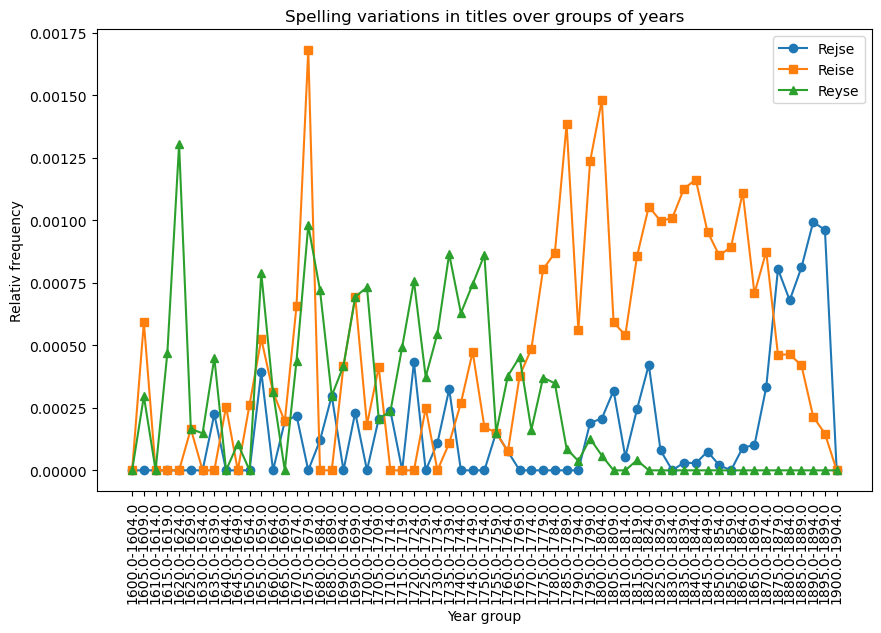

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) # Optional: Set the figure size

# Plot each Y column against the X column
plt.plot(grouped_subset['year_group'], grouped_subset['rejse'], marker='o', label='Rejse')
plt.plot(grouped_subset['year_group'], grouped_subset['reise'], marker='s', label='Reise')
plt.plot(grouped_subset['year_group'], grouped_subset['reyse'], marker='^', label='Reyse')



# Add titles and labels
plt.title('Spelling variations in titles over groups of years')
plt.xlabel('Year group')
plt.ylabel('Relativ frequency')

# Rotate the x axis labels to 90 degrees
plt.xticks(rotation=90)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()